# Matplotlib 3D
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [matplotlib_3D.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Visualization-Tools/matplotlib_3D.ipynb)
---
Examples of 3D visualization using *Matplotlib*.

<font color="#CC0000">[<b>PT-BR<b> content]</font>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)

## 1. 3D
---
Exemplos de visualização em 3D.

- **Contorno 3D**: Visualização de superfície e contorno sobre os três eixo, representados pela equação:

$$
\large
z=(1 - x + yx^3 + y^5)e^{-x^2-y^2}
$$

- **Superformula 3D**: Visualização de forma complexa descrita pela equação da *Superformula*, em coordenadas polares:

$$
\large
r(\varphi)=\left(
\left\lvert
\frac{\cos\left(\frac{m\varphi}{4}\right)}{a}
\right\rvert^{n_2}+
\left\lvert
\frac{\sin\left(\frac{m\varphi}{4}\right)}{b}
\right\rvert^{n_3}
\right)^{-\frac{1}{n_1}}
$$

Sendo **r** o raio e $\varphi$ o ângulo. Os parâmetros **a, b, m, $n_1$, $n_2$, $n_3$** podem ser modificados, para obter diferentes formas. As coordenadas cartesianas podem ser definidas por:

$$
\large
\begin{aligned}
x &= r_1(\phi)\cos(\phi)\cdot r_2(\theta)\sin(\theta) \\
y &= r_1(\phi)\sin(\phi)\cdot r_2(\theta)\sin(\theta) \\
z &= r_2(\theta)\cos(\theta)
\end{aligned}
$$

Sendo $\phi$ a *altura* e $\theta$ o *azimute*.

In [3]:
# Dados para Contorno 3D
M, N = 32j, 32j
Y, X = np.mgrid[-3:3:N*8, -3:3:M*8]
Z = (1 - X + Y*X**3 + Y**5)*np.exp(-X**2 - Y**2)

# Dados para Superformula 3D
N = 256j
# Coordenada polar
phi, theta = np.mgrid[0:2*np.pi:N, 0:np.pi:N]
a1, b1, m1, n11, n12, n13 = 1, 1, 9, 3.4, 4.5, 5.3
r1 = (np.absolute(np.cos(m1*phi/4)/a1)**n12 + np.absolute(np.sin(m1*phi/4)/b1)**n13)**(-1/n11)
a2, b2, m2, n21, n22, n23 = 1, 1, 24, 2, 4, 2
r2 = (np.absolute(np.cos(m2*theta/4)/a2)**n22 + np.absolute(np.sin(m2*theta/4)/b2)**n23)**(-1/n21)
# Coordenada cartesiana
x = r1*np.cos(phi)*r2*np.sin(theta)
y = r1*np.sin(phi)*r2*np.sin(theta)
z = r2*np.cos(theta)

In [4]:
# Parâmetros de visualização
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

dist = (x**2 + y**2 + z**2)**0.5
dist = (dist - dist.min())/(dist.max() - dist.min())

light = LightSource(altdeg=45, azdeg=315)
light_surface = light.shade(dist, cmap=cm.plasma,
                            blend_mode='soft', vert_exag=10)

def defineGrid(ax, lX, lY, lZ):
    # define limites
    ax.set_xlim(lX)
    ax.set_ylim(lY)
    ax.set_zlim(lZ)
    # remove pane
    ax.w_xaxis.pane.set_alpha(0)
    ax.w_yaxis.pane.set_alpha(0)
    ax.w_zaxis.pane.set_alpha(0)
    # altera grid
    ax.w_xaxis.gridlines.set_alpha(0.5)
    ax.w_yaxis.gridlines.set_alpha(0.5)
    ax.w_zaxis.gridlines.set_alpha(0.5)
    # remove spines
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

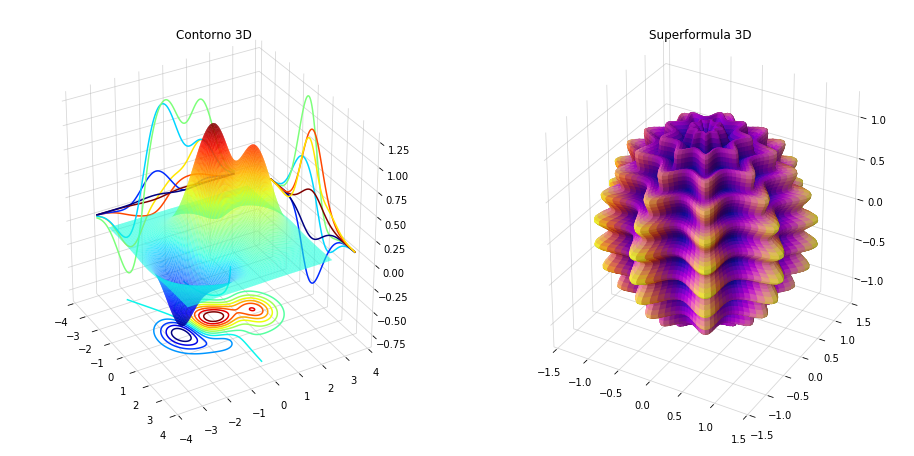

Wall time: 7.15 s


In [5]:
%%time
fig, (axA, axB) = plt.subplots(1, 2, subplot_kw={'projection': '3d'})

# Contorno 3D
axA.view_init(30, -30)
axA.plot_surface(X, Y, Z, lw=1, cmap='jet', rstride=2, cstride=2, alpha=0.75)
axA.contour(X, Y, Z, 8, zdir='x', cmap='jet', offset=X.min() - 1)
axA.contour(X, Y, Z, 8, zdir='y', cmap='jet', offset=Y.max() + 1)
axA.contour(X, Y, Z, 16, zdir='z', cmap='jet', offset=Z.min() - 0.1)
axA.set_title('Contorno 3D')
defineGrid(axA,
           [X.min() - 1, X.max() + 1],
           [Y.min() - 1, Y.max() + 1],
           [Z.min() - 0.1, Z.max() + 0.1])

# Superformula 3D
axB.plot_surface(x, y, z,  rstride=2, cstride=2, facecolors=light_surface)
axB.set_title('Superformula 3D')
defineGrid(axB, [-1.5, 1.5], [-1.5, 1.5], [-1.25, 1.25])

plt.show()